# Mean and standard deviation

**Problem 3a.** In this problem we look at the mean and the standard deviation from a more statistical point of view.
 * Generate $N=1\,000$ values $x_1,\ldots,x_n$ from Poisson($\lambda$) distribution for $\lambda=10$. You might want to use the function **poisson(lambda,shape)** from package **numpy.random**.
 * Plot a histogram of these values. What is the mean of Poisson($\lambda$)? What is the standard deviation? Are these values a good description of what you see in the histogram?
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. Plot the values of $\bar{x}_i$.
 * On the same figure, plot a horizontal line corresponding to the expected value ($\lambda$) of all those averages.
 * Compute (analitically) the standard deviation $\sigma_i$ of the $i$-th average and plot lines $\lambda \pm \sigma_i$, again on the same figure.
 * Does the standard deviation accurately describe the *typical* deviations?

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

1. Sprawdzę, czy $\sum_k P(X=k) =1$.

$\sum_k P(X=k) = \sum_{k/\{0\}} \frac{1}{4|k|(|k|+1)} + P(X=0) = 2\sum_{k=1}^{\infty} \frac{1}{4k(k+1)} + \frac{1}{2} = \frac{1}{2} \sum_{k=1}^{\infty} \frac{1}{k(k+1)} + \frac{1}{2}$

Liczę sumę.

$\sum_{k=1}^{\infty} \frac{1}{k(k+1)} = \sum_{k=1}^{\infty} \frac{1}{k} - \frac{1}{k+1} = \frac{1}{1} - \frac{1}{2} + \frac{1}{2} - \frac{1}{3} + \frac{1}{3} .... = 1$

Podstawiam.

$\sum_k P(X=k) = \frac{1}{2} \cdot 1 + \frac{1}{2} = 1$

Zatem formuła opisuje rozkład dyskretny.

2. Spróbuje obliczyć wartość oczekiwaną.

$E(X) = \sum_k k P(X=k) = \sum_{k/\{0\}} \frac{k}{4|k|(|k|+1)} + 0 P(X=0) = 2\sum_{k=1}^{\infty} \frac{1}{4(k+1)} = \frac{1}{2} \sum_{k=1}^{\infty} \frac{1}{(k+1)} = \frac{1}{2} \sum_{k=2}^{\infty} \frac{1}{k} = \lim_{n->\infty} \frac{1}{2}(H_n - 1) = \infty$

Uzyskałem szereg harmoniczny z granicą w nieskończoności zatem poszukiwana suma jest rozbieżna czyli wartość oczekiwana nie istnieje.

<function matplotlib.pyplot.show(close=None, block=None)>

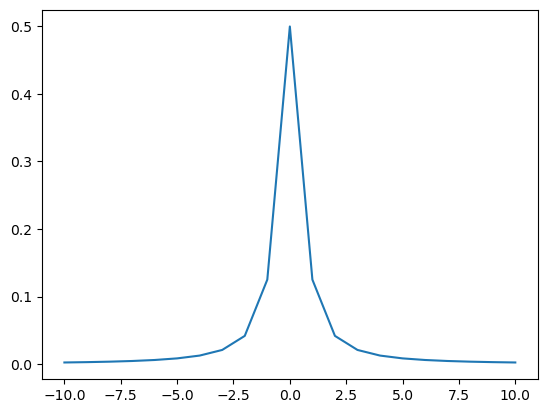

In [177]:
#3.
import matplotlib.pyplot as plt
import numpy as np

def f(k):
    if k == 0:
        return 1/2
    return 1/(4*abs(k)*(abs(k)+1))

x = np.arange(-10,11)
y = [f(k) for k in x]

plt.plot(x,y)
plt.show

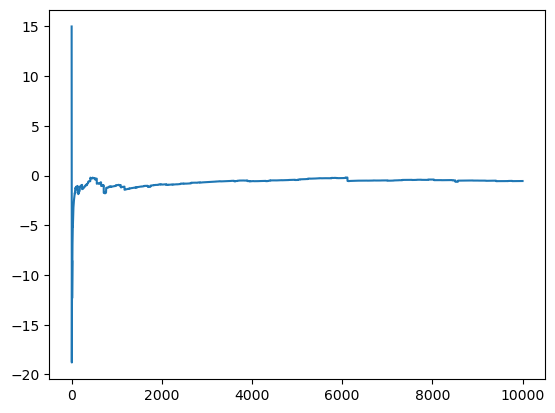

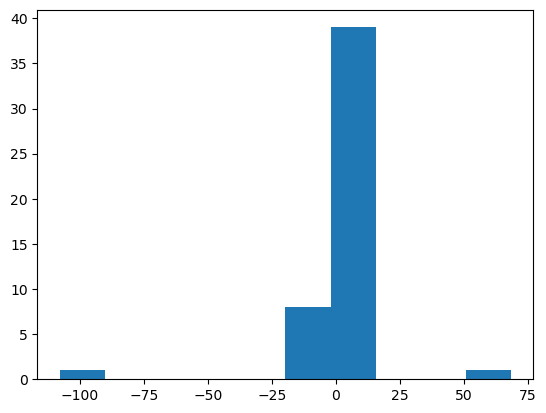

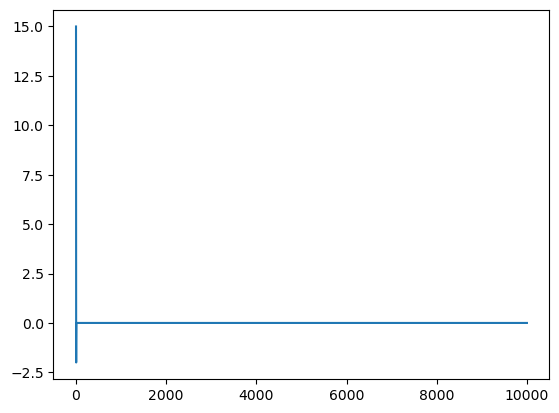

In [254]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

#4.
def sample(n):
    choices = np.random.choice([-1,0,1], n, p=[0.25, 0.5, 0.25])
    probs = np.floor(1/(-np.random.uniform(-1,0,n)))
    return probs * choices

N = 10000

#5.
x = sample(N)

#6.
x_mean = np.cumsum(x) / np.arange(1,N+1)

#7.
plt.plot(np.arange(1,N+1),x_mean)
plt.show()

means = [np.sum(sample(N)) / N for i in range(1,50)]

#7.
plt.hist(means)
plt.show()

#8.
x_median = [np.median(x[0:i]) for i in range(1,N+1)]

#9.
plt.plot(np.arange(1,N+1),x_median)
plt.show()

10. Do znalezienia $c$ lepiej zadziała metoda z wyznaczaniem median. Metoda ze średnimi ma tą wadę, że bardzo duże albo bardzo małe wartości mogą ją zaburzyć od środka na wiele iteracji. Natomiast metoda z medianami osiąga poszukiwany środek o wiele szybciej i się go trzyma.

**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.